### Bringing Trend Filtering into the Continous Domain

Recall Trend Filtering refers to the discrete optimization problem of 

$$ \min_{\mathbf{\beta }} \sum_{i=1}^{n} \left( y_{i}-\beta_{0}-\sum_{j=1}^{p} \beta_{j} x_{i j} \right)^{2}+\lambda \sum_{j=1}^{p} \left| \beta_{j}-\beta_{j-1} \right| $$

where $\lambda$ is a tuning parameter. The goal is to find a sequence of $\beta_j$ that minimizes the sum of squared residuals while also minimizing the sum of absolute differences between consecutive $\beta_j$. This is a convex optimization problem and can be solved using standard convex optimization techniques.

The solution is a discrete vector. To bring into the continous domain we utilize the falling factorial basis first suggested by [1]. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import sys

sys.path.append("../../")
sys.path.append("../../basis/")
sys.path.append("../../estimators")
sys.path.append("../../estimators/trend_filtering")
sys.path.append("../../estimators/trend_filtering/helpers")
sys.path.append("../../model_selection")


### basis functions
from continous_tf import Continous_TF
from falling_factorial_gen import Falling_Factorial_Basis

### model_selection
from cv_base_estimator import cv_base_estimator

### estimators
from trend_filter import Trend_Filter

### helpers
from difference_matrix import Difference_Matrix


### Generate Noisy Data

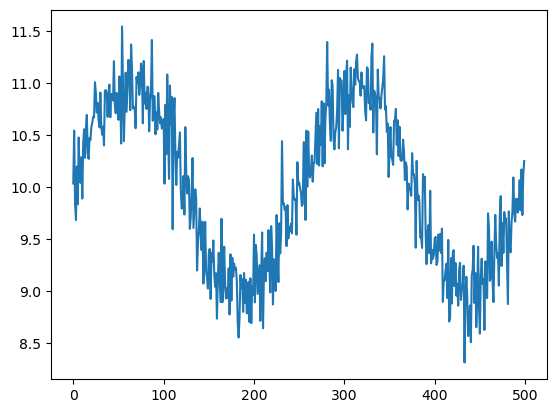

In [2]:
x=np.linspace(0, 2 * np.pi, 500)
noisy_signal =np.sin(2*x) + np.random.normal(0, 0.25, 500)+10

plt.plot(noisy_signal)

### Sample TF Problem solved with Primal Dual Interior Point Method

Below we solve the TF problem for a sample of data. It utilizes a primal dual interior point method originally suggested by Boyd.

An exponentially spaced grid is used for potential lambda values. 1-fold cross validation is used to select the best lambda value. 

In [3]:
tf=Trend_Filter(x=x,y=noisy_signal,k=1,method='primal_dual')


cv_base_estimator(tf)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.20357601084615937
Performing cross validation for lambda = 0.39304374179579166
Performing cross validation for lambda = 0.7588486596369093
Performing cross validation for lambda = 1.4651073837270805
Performing cross validation for lambda = 2.8286794983319536
Performing cross validation for lambda = 5.461325083168113
Performing cross validation for lambda = 10.544167934765811
Performing cross validation for lambda = 20.357601084615936
Performing cross validation for lambda = 39.30437417957916
Performing cross validation for lambda = 75.88486596369093
Performing cross validation for lambda = 146.5107383727079
Performing cross validation for lambda = 282.8679498331954
Performing cross validation for lambda = 546.1325083168114
Performing cross validation for lambda = 1054.41679347658
Performing cross validation for lambda = 2035.7601084615935
Performing  1 out of 3 iterations of cross validatio

{'lambda_': 0.20211320764200363}

### Let's Visualize results

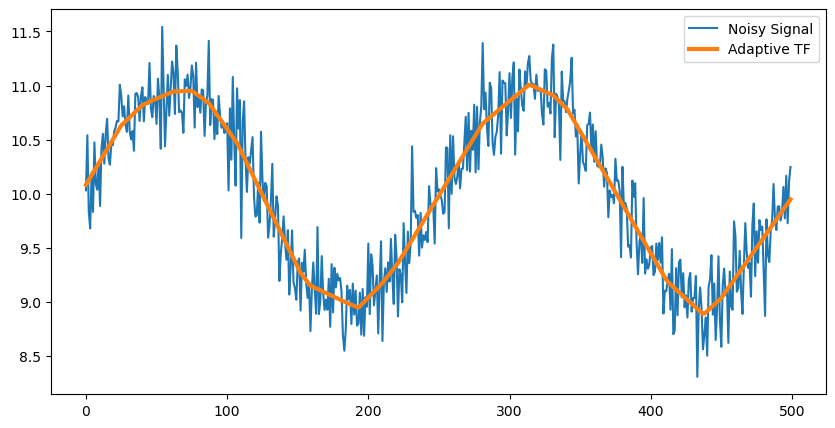

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)

ax.legend()


### Same problem solved with ADMM

In [5]:
tf=Trend_Filter(x=x,y=noisy_signal,k=1,method='admm')

cv_base_estimator(tf)


Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.25531411096835466
Performing cross validation for lambda = 0.49293437419844827
Performing cross validation for lambda = 0.9517072767534299
Performing cross validation for lambda = 1.8374590777895115
Performing cross validation for lambda = 3.54757806840412
Performing cross validation for lambda = 6.84930091970386
Performing cross validation for lambda = 13.223929730110209
Performing cross validation for lambda = 25.531411096835463
Performing cross validation for lambda = 49.29343741984483
Performing cross validation for lambda = 95.170727675343
Performing cross validation for lambda = 183.74590777895096
Performing cross validation for lambda = 354.757806840412
Performing cross validation for lambda = 684.930091970386
Performing cross validation for lambda = 1322.3929730110194
Performing cross validation for lambda = 2553.1411096835463
Performing  1 out of 3 iterations of cross validation
Pe

{'lambda_': 1.4545797986425684}

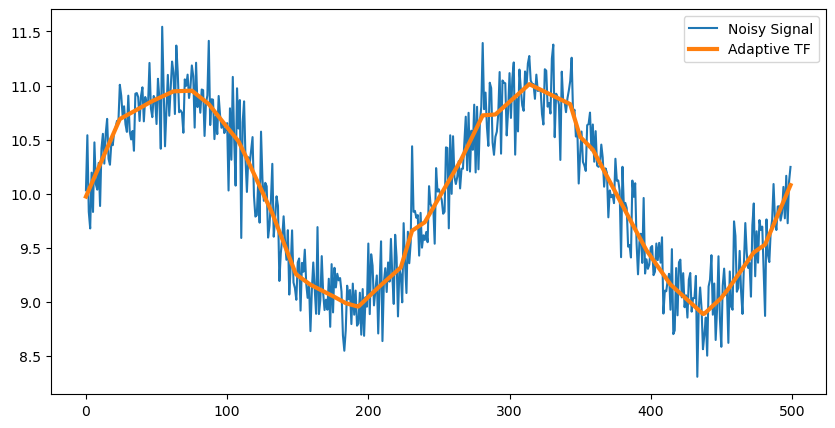

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)
ax.legend()

### Construction of Falling Factorial Basis

The falling factorial basis has similar properties to splines and is constructed as follows:

$$ h_{j}(x)=\prod_{i=1}^{j-1} (x-x_l) \quad j=1, \ldots , k+1 $$
$$ h_{k+1+j}(x) = \prod_{i=1}^{k} (x-x_{j+l}) \ 1{x \geq x_{j+k}} \quad j=1 \ldots , n-k-1 $$

such that $h_1(x)=1$

The difference is that the falling factorial basis does not require continuity of derivatives at the knots

In [7]:
x_tf=tf.y_hat

t=np.arange(1,501)

ffb=Falling_Factorial_Basis(t,1)

print(ffb.h_j_x(np.array([1.5])))

print(f"Shape of h_j_x: {ffb.h_j_x(np.array([1.5])).shape}")


[[1. ]
 [0.5]]
Shape of h_j_x: (2, 1)


In [8]:
print(ffb.h_k_j_x(np.array([15])))

print(f"Shape of h_k_j_x: {ffb.h_k_j_x(np.array([1.5])).shape}")


[[14.]
 [13.]
 [12.]
 [11.]
 [10.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 4.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

### Continous TF Evaluation

In [9]:
D=tf.D

ctf=Continous_TF(x_tf,D,D.k)

print(f"Number of phi coefficients: {len(ctf.phi)}")

print(f"Phi coefficients: {ctf.phi}")

print(f"Number of theta coefficients: {len(ctf.theta)}")

print(f"Theta coefficients: {ctf.theta}")


Number of phi coefficients: 2
Phi coefficients: [[9.97459062]
 [2.37177681]]
Number of theta coefficients: 498
Theta coefficients: [[ 7.87641313e-04]
 [ 7.64355191e-04]
 [ 7.66075936e-04]
 [ 7.78684003e-04]
 [ 7.85073415e-04]
 [ 7.66991434e-04]
 [ 7.07017297e-04]
 [ 5.90506373e-04]
 [ 4.07328497e-04]
 [ 1.53245907e-04]
 [-1.69194678e-04]
 [-5.50342105e-04]
 [-9.73733264e-04]
 [-1.41698901e-03]
 [-1.85325588e-03]
 [-2.25309109e-03]
 [-2.58665125e-03]
 [-2.82601747e-03]
 [-2.94747504e-03]
 [-2.93356399e-03]
 [-2.77472999e-03]
 [-2.47043152e-03]
 [-2.02959807e-03]
 [-1.79305665e+00]
 [-7.37971593e-04]
 [ 5.11721566e-05]
 [ 8.57338126e-04]
 [ 1.63889211e-03]
 [ 2.35501871e-03]
 [ 2.96843296e-03]
 [ 3.44784595e-03]
 [ 3.76998910e-03]
 [ 3.92103802e-03]
 [ 3.89732808e-03]
 [ 3.70531457e-03]
 [ 3.36079557e-03]
 [ 2.88747831e-03]
 [ 2.31502477e-03]
 [ 1.67675351e-03]
 [ 1.00719871e-03]
 [ 3.39732715e-04]
 [-2.95556058e-04]
 [-8.73569207e-04]
 [-1.37537263e-03]
 [-1.00468403e-01]
 [-1.97630536e

In [10]:
x_tf[0]-x_tf[1]

array([-0.02986436])

In [11]:
ctf.h_j_x(np.array([105.55]))


array([[  1.  ],
       [105.55]])

### Let's Visualize the Coefficients

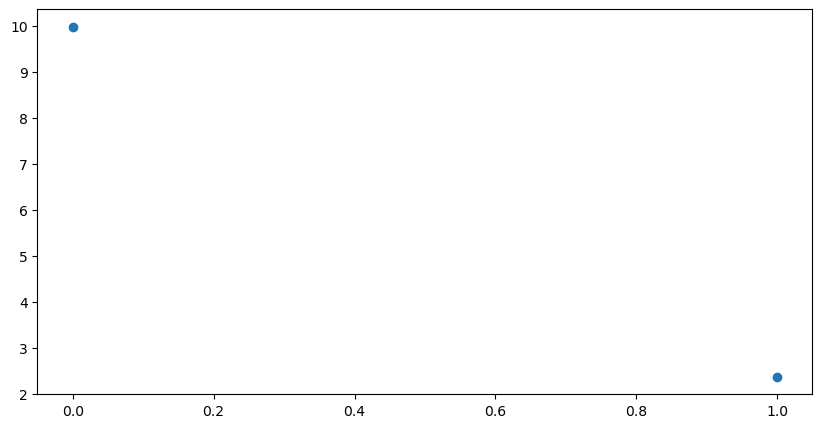

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.phi)),ctf.phi,label="phi")

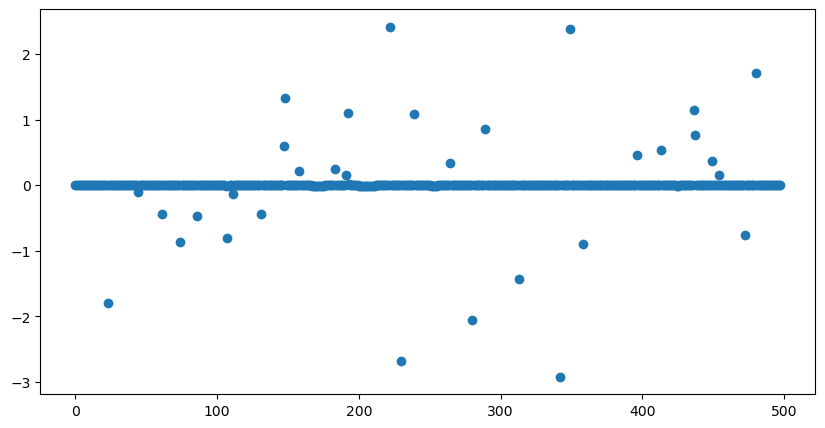

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.theta)),ctf.theta,label="theta")


### Continous TF Evaluation

First examine the Time Difference Matrix. This is just the standard difference matrix as we are equally spaced time

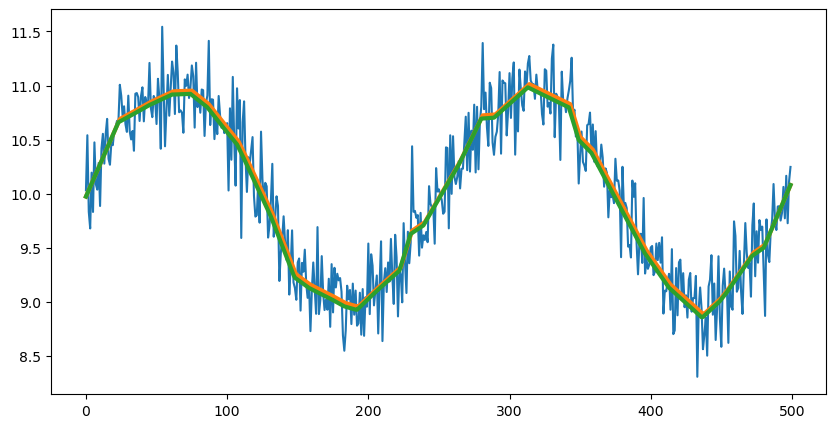

In [14]:
x_equal=x

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)
ax.plot(ctf.evaluate_tf(x_equal),label="Continous TF",lw=3)


### References

- The Falling Factorial Basis and Its Statistical Applications https://proceedings.mlr.press/v32/wange14.html
- Fast and Flexible ADMM Algorithms for Trend Filtering https://www.tandfonline.com/doi/full/10.1080/10618600.2015.1054033
